In [85]:
import json

with open("complete.json", "r") as complete_programs:
    programs = json.loads(complete_programs.read())["programs"]

In [96]:
composers_seasons = {}
for program in programs:
    if program["concerts"][0]["eventType"] != "Subscription Season":
        continue
        
    comps = list(map(lambda d: d.get("composerName"), program["works"]))
    
    if program["season"] in composers_seasons.keys():    
        composers_seasons[program["season"]] += comps
    else:
        composers_seasons[program["season"]] = comps

### Getting birth years of composers using Wikipedia


- Writing all this data to file so we can have one centralized location of birth years.
- Unfortunately there are some spelling errors in the data, so I had to manually search for birth years.
- For younger composers, needed to find personal websites to get birth year information. Some examples/sources:

  - http://www.aiyanatedibraun.com/
  - http://www.tengkuirfan.com/bio/
  - http://www.garyfagin.com/
  - https://www.naxos.com/person/Nicola_Ferro/44578.htm

In [168]:
import wikipedia
import itertools
import re

def format_name(composer_name):
    temp_st = composer_name.replace(",", "").split()
    new_st = " ".join(itertools.chain(temp_st[1::], [temp_st[0]]))
    return new_st

def find_composer_birthyear(composer_name):        
    new_name = format_name(composer_name)
    try:
        page = wikipedia.page(new_name).summary
    except:
        return False
        
    rexpression = "(\d{4})"
    groups = re.search(rexpression, page)
    if groups == None:
        return False
    
    return groups.group(1)

def find_cached_composer_birthyear(composer_name):
    val = next(c for c in composers_and_years if c[0] == composer_name)
    return val

In [185]:
with open("composers.txt", "r") as f:
    f_string = f.read()
    composers_and_years_raw = f_string.split("\n")
    
    composers_and_years = list(map(lambda x: x.split(" | "), composers_and_years_raw[0:-1]))

## Plotting
In the cell above, I collected all the composer's birthdates and put it together in a nice list, ignoring all values I couldn't find.

I want to plot the difference between the birthdate of the composer and the year the composer's music is being played. For now, we'll stick with 2013.

I'm presenting this data in a historgram, with buckets of 20.

In [214]:
import matplotlib.pyplot as plt
from numpy import median

def draw_plot_for_year(year_of_season):
    buckets = range(20, 400, 20)

    years_of_composers = []
    season = "{}-{}".format(year_of_season, str(year_of_season+1)[2::])
    for composer in composers_seasons.get(season):
        if composer == None or composer == "Anthem," or composer == "Unspecified":
            continue
            
        c_and_y = find_cached_composer_birthyear(composer)
        if c_and_y[1] == 'False':
            continue
            
        years_of_composers.append(int(c_and_y[1]))

    years_diff = list(map(lambda x: year_of_season - x, years_of_composers))
    print("Median # of years: ", median(years_diff))


    plt.hist(years_diff, buckets)
    plt.title("Years Difference, " + season)
    plt.ylabel("Number of Composers (per performance)")
    plt.xlabel("Composer's Age at Time of Concert")
    plt.show()

Median # of years:  88.0


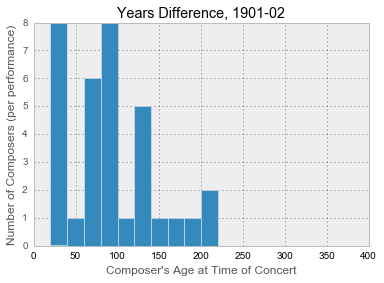

Median # of years:  72.0


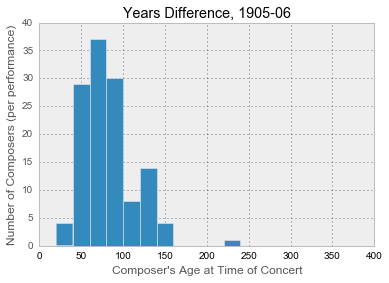

Median # of years:  116.0


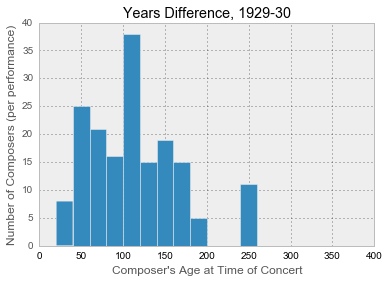

Median # of years:  116.0


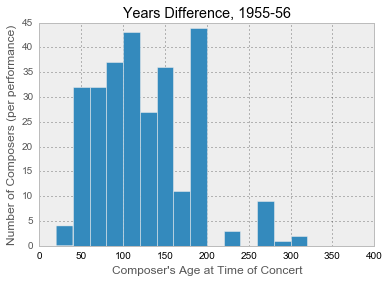

Median # of years:  136.0


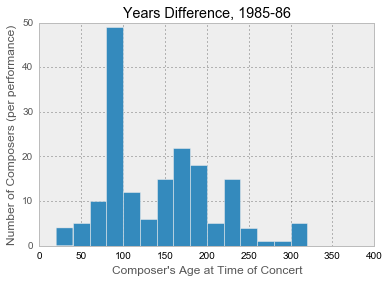

Median # of years:  158.0


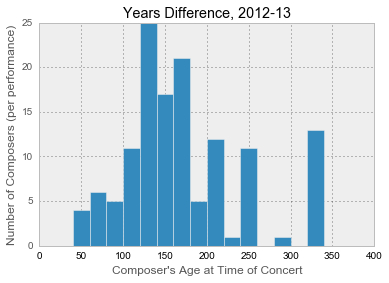

Median # of years:  175.0


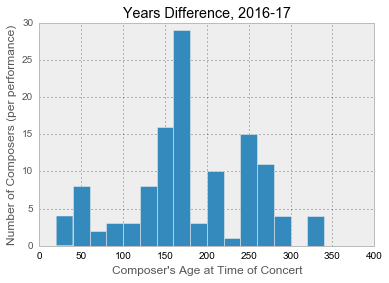

In [215]:
draw_plot_for_year(1901)
draw_plot_for_year(1905)
draw_plot_for_year(1929)
draw_plot_for_year(1955)
draw_plot_for_year(1985)
draw_plot_for_year(2012)
draw_plot_for_year(2016)

In [183]:
for composer in set(composers_seasons.get("1955-56")):
    composers_only = list(map(lambda x: x[0], composers_and_years))
    
    if composer == None or composer == "Anthem," or composer == "Unspecified" or composer == "Traditional,":
        continue
    if composer in composers_only:
        continue
    #print(composer, "|", find_composer_birthyear(composer))